In [38]:
#Importing libraries
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random


In [39]:
#loading dataset

my_data_dir = ' ' #enter path to dataset here 
os.listdir(my_data_dir) 



['Test', 'Train']

In [40]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'


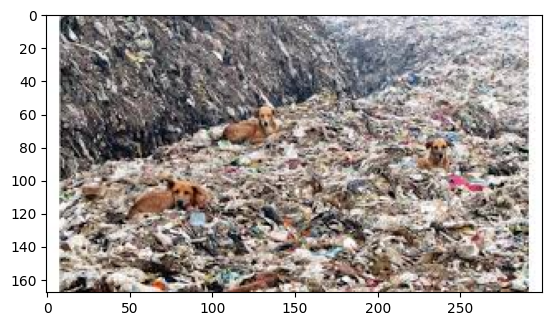

In [41]:
#sample image
categories = os.listdir(train_path)
random_category= random.choice(categories)
random_category_dir = os.path.join(train_path, random_category)
category_files = os.listdir(random_category_dir)
random_sample_filename = random.choice(category_files)
category_files = os.listdir(random_category_dir)

sample_path= os.path.join(random_category_dir, random_sample_filename)
sample_img=imread(sample_path)
plt.imshow(sample_img)

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

In [43]:
image_gen.flow_from_directory(test_path)

Found 244 images belonging to 2 classes.


In [44]:
image_gen.flow_from_directory(train_path)

Found 380 images belonging to 2 classes.


In [45]:
#loading libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [46]:
image_shape=(32,32,1)

#model

model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its multi-class classification so we use sigmoid
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 64)         

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=5, monitor='val_loss')

In [49]:
batch_size = 16
image_shape=(32,32,1)
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 380 images belonging to 2 classes.


In [50]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 244 images belonging to 2 classes.


In [51]:
train_image_gen.class_indices

{'plastic': 0, 'trash': 1}

In [56]:

import warnings
import scipy
warnings.filterwarnings('ignore')
results = model.fit(train_image_gen,epochs=80,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/80
24/24 [==============================] - 3s 137ms/step - loss: 0.4359 - accuracy: 0.8158 - val_loss: 0.4491 - val_accuracy: 0.8074
Epoch 2/80
24/24 [==============================] - 3s 126ms/step - loss: 0.4062 - accuracy: 0.8237 - val_loss: 0.4569 - val_accuracy: 0.7992
Epoch 3/80
24/24 [==============================] - 3s 126ms/step - loss: 0.3902 - accuracy: 0.8342 - val_loss: 0.4514 - val_accuracy: 0.8156
Epoch 4/80
24/24 [==============================] - 3s 120ms/step - loss: 0.4228 - accuracy: 0.8316 - val_loss: 0.4391 - val_accuracy: 0.8238
Epoch 5/80
24/24 [==============================] - 3s 116ms/step - loss: 0.4043 - accuracy: 0.8474 - val_loss: 0.4657 - val_accuracy: 0.7869
Epoch 6/80
24/24 [==============================] - 3s 114ms/step - loss: 0.4140 - accuracy: 0.8158 - val_loss: 0.4437 - val_accuracy: 0.7910
Epoch 7/80
24/24 [==============================] - 3s 122ms/step - loss: 0.4036 - accuracy: 0.8184 - val_loss: 0.4399 - val_accuracy: 0.8074
Epoch 

In [57]:
from tensorflow.keras.preprocessing import image
y_pred = np.argmax(model.predict(test_image_gen), axis=-1)
# y_pred = np.round(y_pred).astype(int)
# pred_probabilities = model.predict_classes(test_image_gen)
print(y_pred)

16/16 [==============================] - 1s 62ms/step
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1]


In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.85       192
           1       0.42      0.31      0.36        52

    accuracy                           0.76       244
   macro avg       0.62      0.60      0.60       244
weighted avg       0.74      0.76      0.75       244



In [59]:
import cv2

# Read the sample image as grayscale
sample_img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to the desired input shape (32x32)
sample_img_resized = cv2.resize(sample_img, (32, 32))

# Reshape the image to (1, 32, 32, 1)
sample_img_reshaped = sample_img_resized.reshape(1, 32, 32, 1)

# Now you can make predictions with the reshaped grayscale image
pred = model.predict(sample_img_reshaped)

pred = np.argmax(pred)

if (pred==1):
  print ('trash')
elif(pred==0) :
  print ('plastic')


1/1 [==============================] - 0s 92ms/step
trash
